# Compressing Data via Dimensionality Reduction

## Principal Component Analysis

In [1]:
# extracting the principal components step by step

# importing data
import pandas as pd
import numpy as np

df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
#                    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
#                    'Proanthocyanins', 'Color intensity', 'hue', 'OD280/OD315 of diluted wines', 
#                    'Proline']

In [2]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:], df_wine.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=0, 
                                                    test_size=0.3, 
                                                    stratify=y)

# standardizing data features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) # only fit on the training data
X_test_std = stdsc.transform(X_test)

/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/zach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [3]:
# get eigenvectors of covariance matrix

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print ('\nEigenvalues \n %s' % eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [4]:
# total and explained variance
# we want to select the subset of eigenvectors that contains the most information (variance)
import matplotlib.pyplot as plt

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
# make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# sort the tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# construct a transformation matrix
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:,np.newaxis]))
print ('Matrix W: \n', w)

Matrix W: 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


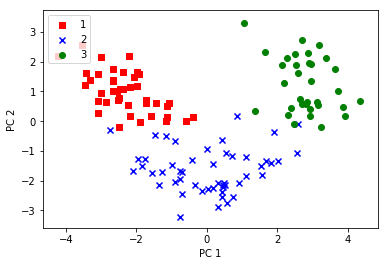

In [6]:
# transform training data using PCA
X_train_pca = X_train_std.dot(w)

# visualize transformed dataset
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], # first column of X_train PCA where y==class
                X_train_pca[y_train==l, 1], # second column of X_train PCA where y==class
                c=c,
                label=l,
                marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
# plt.xlim([-4.5, 4.5])
plt.show()

## Principal Component Analysis in Scikit Learn

In [7]:
# function for visualizing decision boundries in 2D
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


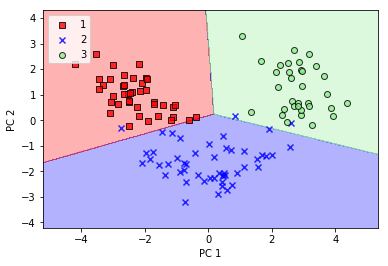

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
lr=LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.show()

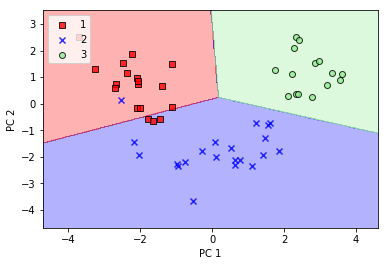

In [9]:
# plot decision regions for test data
X_test_pca = pca.transform(X_test_std)
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.show()

# Linear Discriminant Analysis (LDA)

LDA is similar to PCA. 

In PCA we try to find the orthogonal component axes of maximum variance in a dataset.

In LDA, by contrast, we try to find the features subspace that optimizes class separability.

## Inner Workings of Linear Discriminant Analysis

In [10]:
# computing the scatter matrices
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print ('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [11]:
# compute within class scatter matrices
d = 13 # number of features
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter   

In making the above calculation of the scatter matrices, we are implicitly assuming all class labels are uniformly distributed, which is not the case. We need to scale the individual scatter matrices before we sum them up.

Computing the scatter matrix is actually the same as converting the covariance matrix, which is a normalized version of the scatter matrix. 

In [12]:
d = 13 # number of features
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter 

Next, we need to compute the between class scatter matrix.

In [13]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train== i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

Similar to PCA, we now want to select the linear discriminants for our new feature subspace.

In [26]:
# calc eigenvalues and eigenvectors of S_W^-1 * S_B
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# sort by largest eigen value
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k:k[0], reverse=True)
print ('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print (eigen_val[0])

Eigenvalues in descending order:

349.61780890599397
172.7615221897939
2.805095421266577e-14
2.5015312352537005e-14
2.5015312352537005e-14
2.1361100171159e-14
2.1361100171159e-14
1.1165814790657668e-14
7.863828857422134e-15
5.346017033674624e-15
5.346017033674624e-15
3.9459664709251314e-15
0.0


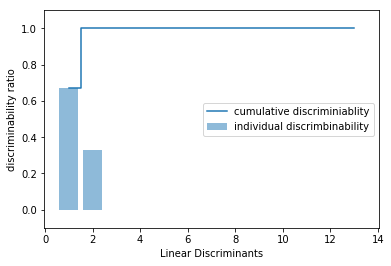

In [27]:
# plotting class discriminatory information

tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1,14), discr, alpha=0.5, align='center',
       label='individual discrimbinability')
plt.step(range(1,14), cum_discr, where='mid',
        label='cumulative discriminiablity')
plt.ylabel('discriminability ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

Next, we'll stack the two most discriminative eigenvector columns to create our transformation matrix.

We will use this matrix, w, to project samples onto the new feature space.

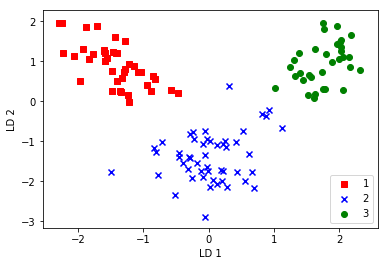

In [29]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:,np.newaxis].real))

X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
               X_train_lda[y_train==l, 1] * -1,
               c=c,
               label=l,
               marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

### LDA via scikit-learn

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


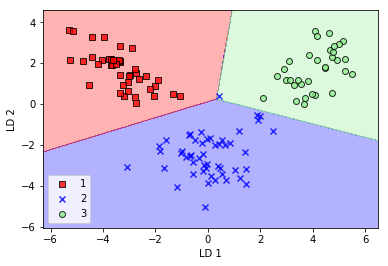

In [32]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

# Kernel PCA for Non-Linear Mappings

Let's start by implementing RBF kernel PCA from scratch.

In [51]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    Parameters
    ------------
    X : {Numpy ndarray}, shape = [n_samples, n_features]
    
    gamma : float
        Tuning parameter of the RBF kernel
    
    n_components : int
        The number of principal components to return
        
    Returns 
    -----------
    X_pc : {Numpy ndarray}, shape = [n_samples, k_features]
        Projected dataset
    """
    
    # Compute euclidean distance between all pints
    sq_dists = pdist(X, 'sqeuclidean')
    
    # convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # obtaining eigenpairs from centereed kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # collect k top eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    
    return X_pc

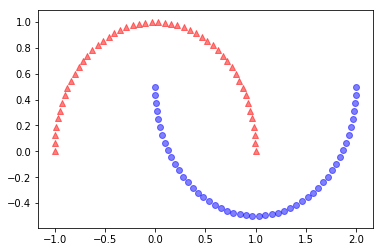

In [52]:
# example 1 separating half moon shapes
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=1)
plt.scatter(X[y==0, 0], X[y==0, 1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
           color='blue', marker='o', alpha=0.5)
plt.show()

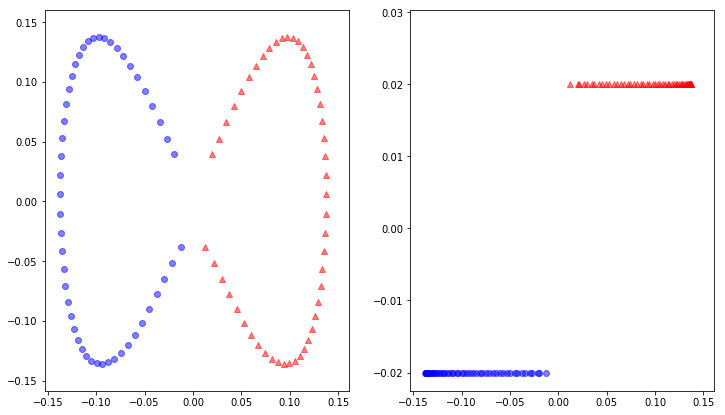

In [53]:
# lineary PCA would be unable to separate these classes
# lets try our KPCA implementation

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
             color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
             color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1)) + 0.02,
             color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1)) - 0.02,
             color='blue', marker='o', alpha=0.5)

plt.show()

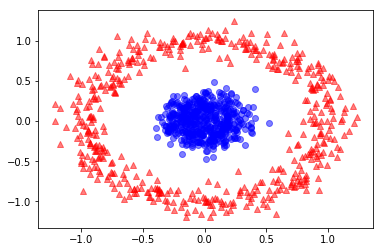

In [59]:
# example 2 - separating concentric circles
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, 
                   random_state=1,
                  noise=0.1,
                  factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
           color='blue', marker='o', alpha=0.5)
plt.show()

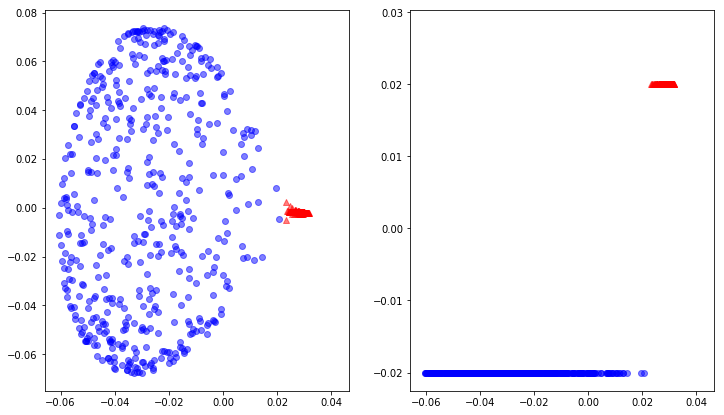

In [61]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
             color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
             color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1)) + 0.02,
             color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1)) - 0.02,
             color='blue', marker='o', alpha=0.5)

plt.show()

### Projecting New Data Points

In real datasets, we will have to project data points that are not part of the dataset onto the new feature space.

In [64]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    Parameters
    ------------
    X : {Numpy ndarray}, shape = [n_samples, n_features]
    
    gamma : float
        Tuning parameter of the RBF kernel
    
    n_components : int
        The number of principal components to return
        
    Returns 
    -----------
    alphas : {Numpy ndarray}, shape = [n_samples, k_features]
        Projected dataset
    
    lambdas : list
        eigenvalues
    """
    
    # Compute euclidean distance between all pints
    sq_dists = pdist(X, 'sqeuclidean')
    
    # convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # obtaining eigenpairs from centereed kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # collect k top eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    
    # collect corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]
    
    return alphas, lambdas

In [66]:
X, y = make_moons(n_samples=100, random_state=1)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

x_new = X[25]
print (x_new)
print (alphas[25]) # original projection

[-0.6235  0.7818]
[0.1132]


In [69]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum(
                                (x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
print (x_reproj)

[0.1132]


# Kernel PCA in scikit-learn

In [70]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=1)
scikit_kpca = KernelPCA(n_components=2,
                       kernel='rbf',
                       gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

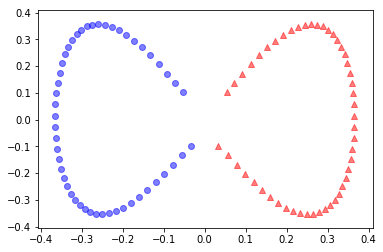

In [71]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],
             color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
             color='blue', marker='o', alpha=0.5)
plt.show()